### Predicting the red wine quality using classification model

### Description


Machine learning has made its foray into food and beverages as well and it is being applied to assess the quality of produce using different parameters. In this problem, the goal is to model the quality of red wine based on its physical properties. This dataset consists of attributes related to the red wine variant of the Portuguese "Vinho Verde" wine.

#### Attributes Description

###### Input variables (based on physicochemical tests):
		1 - fixed acidity 
		2 - volatile acidity 
		3 - citric acid 
		4 - residual sugar 
		5 - chlorides 
		6 - free sulfur dioxide 
		7 - total sulfur dioxide  
		8 - density 
		9 - pH 
		10 - sulphates 
		11 - alcohol content


###### Output Variable

quality of wine (score between 0 and 10) 

In [2]:
#importing all the necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#reading the dataset
wine_data = pd.read_csv('winequality-red.csv',sep=';')

In [4]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#info of the wine_data
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are no null values

In [6]:
#lets see the distribution of the data
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#splitting the data into features and labels
X = wine_data.drop('quality',axis=1)
y = wine_data['quality']

In [8]:
#features shape
X.shape

(1599, 11)

In [9]:
#labels shape
y.shape

(1599,)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
X_scaled = scaler.transform(X)

In [15]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [17]:
X_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [23]:
X_train.shape

(1119, 11)

In [24]:
X_test.shape

(480, 11)

In [25]:
y_train.shape

(1119,)

In [26]:
y_test.shape

(480,)

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [28]:
y_pred = knn.predict(X_test)

In [29]:
from sklearn.metrics import classification_report , confusion_matrix

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.10      0.05      0.06        21
           5       0.69      0.75      0.72       207
           6       0.63      0.54      0.58       195
           7       0.43      0.56      0.48        52
           8       0.20      0.33      0.25         3

    accuracy                           0.61       480
   macro avg       0.34      0.37      0.35       480
weighted avg       0.60      0.61      0.60       480



In [31]:
print(confusion_matrix(y_test,y_pred))

[[  0   0   1   1   0   0]
 [  3   1   9   7   1   0]
 [  0   4 155  41   6   1]
 [  0   5  54 106  30   0]
 [  0   0   6  14  29   3]
 [  0   0   0   0   2   1]]


In [35]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

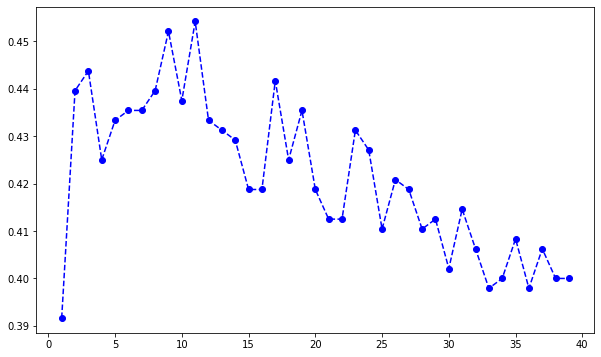

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o')
plt.xlabel('Optimal K value')
plt.ylabel('Error rate')
plt.title()

In [39]:
#lets take K values as 17
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.63      0.68      0.65       207
           6       0.52      0.57      0.55       195
           7       0.36      0.31      0.33        52
           8       0.00      0.00      0.00         3

    accuracy                           0.56       480
   macro avg       0.25      0.26      0.26       480
weighted avg       0.52      0.56      0.54       480



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
print(confusion_matrix(y_test,y_pred))

[[  0   0   1   1   0   0]
 [  0   0  13   7   1   0]
 [  0   0 141  63   3   0]
 [  0   0  63 111  21   0]
 [  0   0   6  30  16   0]
 [  0   0   0   0   3   0]]
